# Hands On

In [1]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

# Data Geneation

clusterDeviation: The standard deviation of the clusters. The larger the number, the further the spacing of the data points within the clusters.

In [2]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    x, y = make_blobs(n_samples=numSamples, centers=centroidLocation, cluster_std=clusterDeviation)
    
    x = StandardScaler().fit_transform(x)
    return x, y

In [3]:
x, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)
print(x[0:5])
print(y[0:5])

[[-1.53311074  1.39870127]
 [-1.38647348  0.89982421]
 [ 0.85213596  0.37829948]
 [ 1.1085084   0.08645119]
 [ 0.26681356 -1.29903583]]
[2 2 0 0 1]


# Pushing Some Noise 

In [4]:
n_noise = 75

x_min, x_max = x[:, 0].min(), x[:, 0].max()
y_min, y_max = x[:, 1].min(), x[:, 1].max()

print(x_min, x_max)
print(y_min, y_max)

-1.967129073052693 1.8524694864770959
-1.9202783482942303 1.5818045029263348


In [5]:
noise = np.random.uniform(
    low=[x_min, y_min],
    high=[x_max, y_max],
    size=(n_noise, 2)
)

noise[0:5]

array([[-0.07294099, -1.80247916],
       [-1.19666616,  0.0210904 ],
       [-0.05186835, -1.67858923],
       [ 0.53402439,  1.27541976],
       [ 0.05650772, -0.33152464]])

In [6]:
y_noise = np.full(n_noise, -1)
y_noise

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1])

In [7]:
x = np.vstack((x, noise))
y = np.concatenate((y, y_noise))
y[-100:]

array([ 2,  1,  1,  2,  0,  2,  2,  0,  0,  1,  0,  0,  1,  2,  2,  2,  1,
        1,  0,  0,  0,  1,  2,  1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

# Modeling

It works based on two parameters: Epsilon and Minimum Points <br/>
  - **Epsilon** determine a specified radius that if includes enough number of points within, we call it dense area
  - **minimumSamples** determine the minimum number of data points we want in a neighborhood to define a cluster.

In [8]:
epsilon = 0.3 #=> R=0.3
minimumSamples = 7 #=> M=7

db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(x)

db

DBSCAN(eps=0.3, min_samples=7)

In [9]:
labels = db.labels_
labels[0:200] # => -1(noises) , 0, 1, 2 (with 3 centroid) 

array([0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 1, 2, 0, 2, 1, 1,
       0, 2, 2, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 1, 0, 1, 0,
       2, 2, 1, 1, 0, 0, 1, 2, 0, 0, 1, 1, 1, 0, 2, 1, 0, 2, 1, 2, 1, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1,
       1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2,
       0, 1, 1, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 2, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 1, 0, 0, 0, 1, 2,
       0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 2, 2,
       1, 2, 2, 1, 0, 0, 1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 0, 2, 0, 0, 1, 2,
       2, 1])

# Distinguish Outliers

Firts, create an array of booleans using the labels from db.

In [10]:
db.core_sample_indices_

array([   0,    1,    2, ..., 1569, 1570, 1573])

In [11]:
core_samples_mask = np.zeros_like(labels, dtype=bool)
print(core_samples_mask.shape[0])
print("\n")
print(core_samples_mask[0:200])

1575


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False F

In [12]:
core_samples_mask[db.core_sample_indices_] = True
print(core_samples_mask.shape[0])
print("\n")
print(core_samples_mask[0:99])

1575


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


Number of clusters in labels, ignoring noise if present.

In [13]:
print(set(labels))
print(len(set(labels)))
print(len(set(labels)) - 1)

{np.int64(0), np.int64(1), np.int64(2), np.int64(-1)}
4
3


In [14]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

Remove repetition in labels by turning it into a set.

In [15]:
unique_labels = set(labels)
unique_labels

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2)}

# Data Visualization

In [16]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

In [17]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
    class_member_mask = (labels == k)
    print(class_member_mask)

[ True  True False ... False False False]
[False False  True ... False False False]
[False False False ...  True  True False]
[False False False ... False False  True]


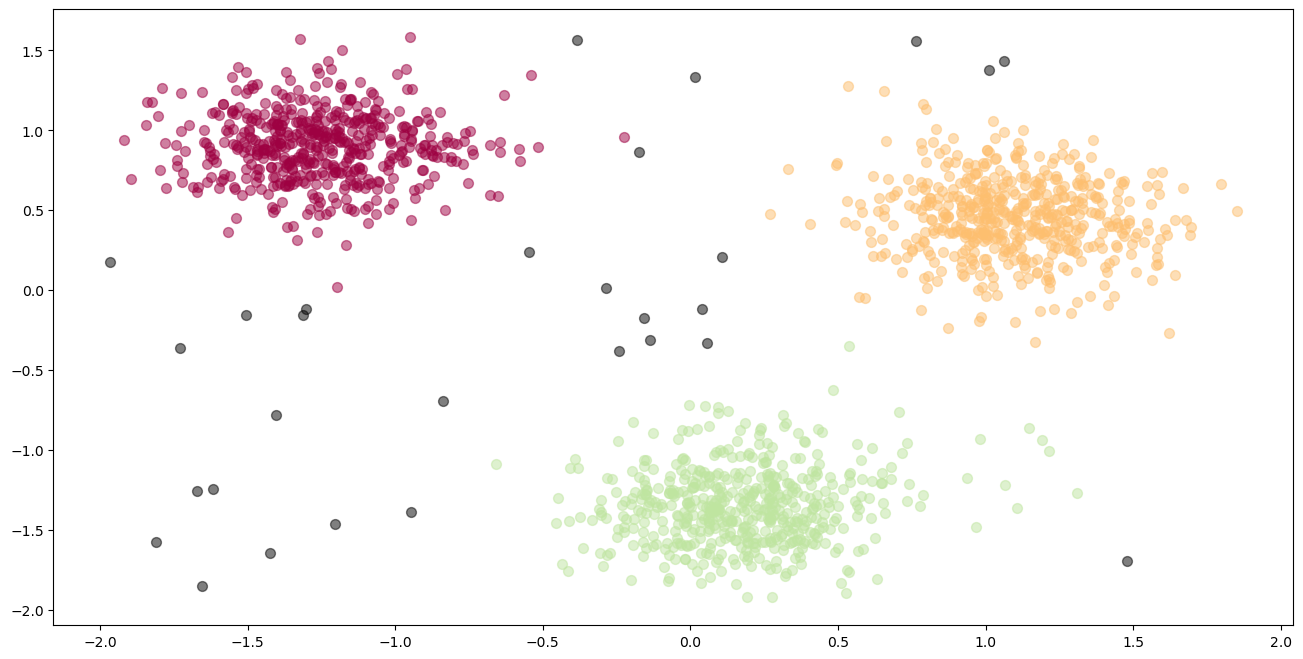

In [18]:
plt.figure(figsize=(16,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'k'
        
    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = x[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker=u"o", alpha=0.5)

    # Plot the outliers
    xy = x[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker=u"o", alpha=0.5)
plt.show()